In [2]:
import yfinance as yf
import pandas as pd
import numpy as np 
# The biggest challege here was downloading yfinance package

In [3]:
msft = yf.Ticker("MSFT")
msft.history
hist = msft.history(start = "2023-01-01", end = "2023-12-31")
hist.head()
# Automatically takes the adjusted close as the close column

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-03 00:00:00-05:00,240.943573,243.590105,235.313487,237.474335,25740000,0.0,0.0
2023-01-04 00:00:00-05:00,230.238485,230.823296,223.974039,227.086441,50623400,0.0,0.0
2023-01-05 00:00:00-05:00,225.203146,225.550076,219.810956,220.356125,39585600,0.0,0.0
2023-01-06 00:00:00-05:00,221.040080,223.775817,217.422165,222.953110,43613600,0.0,0.0
2023-01-09 00:00:00-05:00,224.459731,229.207640,224.420089,225.123840,27369800,0.0,0.0


In [4]:
# hist[['Open','Close']]
# Isolating the columns
hist = hist[['Open','Close','Volume']]
hist.head()

,Open,Close,Volume
Date,,,
2023-01-03 00:00:00-05:00,240.943573,237.474335,25740000
2023-01-04 00:00:00-05:00,230.238485,227.086441,50623400
2023-01-05 00:00:00-05:00,225.203146,220.356125,39585600
2023-01-06 00:00:00-05:00,221.040080,222.953110,43613600
2023-01-09 00:00:00-05:00,224.459731,225.123840,27369800


In [5]:
# Reformat all the entries to a desired format
hist.index = hist.index.strftime('%Y-%m-%d')
hist.head()

,Open,Close,Volume
Date,,,
2023-01-03,240.943573,237.474335,25740000
2023-01-04,230.238485,227.086441,50623400
2023-01-05,225.203146,220.356125,39585600
2023-01-06,221.040080,222.953110,43613600
2023-01-09,224.459731,225.123840,27369800


In [6]:
hist

,Open,Close,Volume
Date,,,
2023-01-03,240.943573,237.474335,25740000
2023-01-04,230.238485,227.086441,50623400
2023-01-05,225.203146,220.356125,39585600
2023-01-06,221.040080,222.953110,43613600
2023-01-09,224.459731,225.123840,27369800
...,...,...,...
2023-12-22,373.679993,374.579987,17091100
2023-12-26,375.000000,374.660004,12673100
2023-12-27,373.690002,374.070007,14905400


In [7]:
# Rename for simplicity
df = hist
# Reformat the dataframe entirely
df["Date"] = df.index
df = df[["Date","Open","Close","Volume"]]
df.index.name = "Index"
df.index = range(1,len(df) + 1)
df
# Completely reformatted df


,Date,Open,Close,Volume
1,2023-01-03,240.943573,237.474335,25740000
2,2023-01-04,230.238485,227.086441,50623400
3,2023-01-05,225.203146,220.356125,39585600
4,2023-01-06,221.040080,222.953110,43613600
5,2023-01-09,224.459731,225.123840,27369800
...,...,...,...,...
246,2023-12-22,373.679993,374.579987,17091100
247,2023-12-26,375.000000,374.660004,12673100
248,2023-12-27,373.690002,374.070007,14905400
249,2023-12-28,375.369995,375.279999,14327000


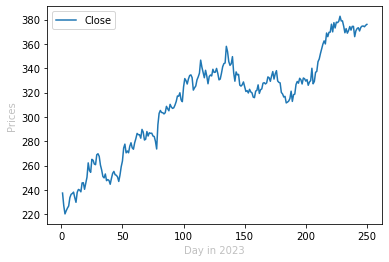

In [8]:
import matplotlib.pyplot as plt 
df[['Date','Close']].plot()
plt.xlabel("Day in 2023",color = 'silver')
plt.ylabel("Prices", color = 'silver')
plt.show()
# This just gives you the stock movement

In [9]:
# Lets get moving averages for MSFT
df['5SMA'] = df['Close'].rolling(window=5).mean()
df


/var/folders/qg/_82c3qpj4113sy3nk71s4k080000gn/T/ipykernel_88581/2152052910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5SMA'] = df['Close'].rolling(window=5).mean()


,Date,Open,Close,Volume,5SMA
1,2023-01-03,240.943573,237.474335,25740000,NaN
2,2023-01-04,230.238485,227.086441,50623400,NaN
3,2023-01-05,225.203146,220.356125,39585600,NaN
4,2023-01-06,221.040080,222.953110,43613600,NaN
5,2023-01-09,224.459731,225.123840,27369800,226.598770
...,...,...,...,...,...
246,2023-12-22,373.679993,374.579987,17091100,372.929999
247,2023-12-26,375.000000,374.660004,12673100,373.332001
248,2023-12-27,373.690002,374.070007,14905400,373.494000
249,2023-12-28,375.369995,375.279999,14327000,374.426001


In [10]:
# Learn how to splice
# Column Isolation:
df['Close']
# Row Isolation:
# Single Row
df.iloc[0]
# Multiple Row
df.iloc[[0,1,2,3]]
# Combination Isolation:
df.iloc[0,3]
df.iloc[:,2]
# All iloc operations start at 0

# loc uses names, iloc uses numbers
# [Row,Column]


1      237.474335
2      227.086441
3      220.356125
4      222.953110
5      225.123840
          ...    
246    374.579987
247    374.660004
248    374.070007
249    375.279999
250    376.040009
Name: Close, Length: 250, dtype: float64

In [11]:
# df.iloc[3:100,4]
df['100SMA'] = df['Close'].rolling(window=100).mean()
df 


/var/folders/qg/_82c3qpj4113sy3nk71s4k080000gn/T/ipykernel_88581/84940917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['100SMA'] = df['Close'].rolling(window=100).mean()


,Date,Open,Close,Volume,5SMA,100SMA
1,2023-01-03,240.943573,237.474335,25740000,NaN,NaN
2,2023-01-04,230.238485,227.086441,50623400,NaN,NaN
3,2023-01-05,225.203146,220.356125,39585600,NaN,NaN
4,2023-01-06,221.040080,222.953110,43613600,NaN,NaN
5,2023-01-09,224.459731,225.123840,27369800,226.598770,NaN
...,...,...,...,...,...,...
246,2023-12-22,373.679993,374.579987,17091100,372.929999,341.886875
247,2023-12-26,375.000000,374.660004,12673100,373.332001,342.380379
248,2023-12-27,373.690002,374.070007,14905400,373.494000,342.856830
249,2023-12-28,375.369995,375.279999,14327000,374.426001,343.322177


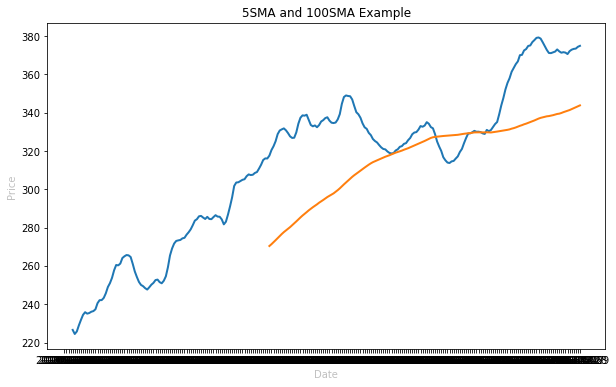

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['5SMA'], label='5SMA', linewidth=2)
plt.plot(df['Date'], df['100SMA'], label='100SMA', linewidth=2)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('5SMA and 100SMA Example')
plt.show()

# This is one technical analysis you can do to see if the price is bullish

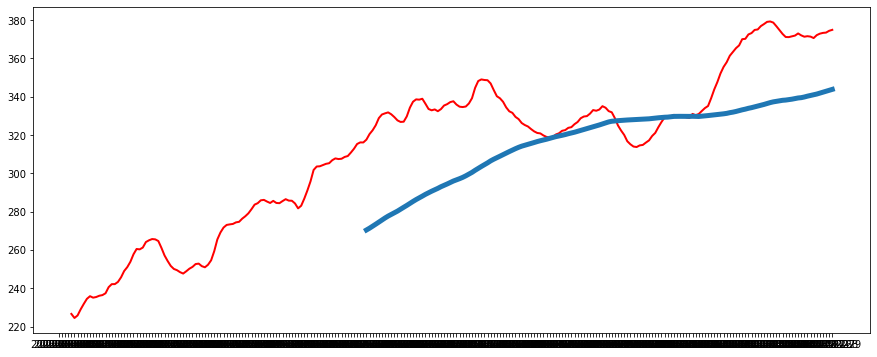

In [13]:
# Give me all the dates where the 5 day SMA is above the 100 day SMA
# df[df['5SMA'] > df['100SMA']]


# Lets observe the opposite
# df[df['5SMA'] < df['100SMA']]

# Short term SMA has to cross over the long term SMA
# This has been happening for a while and its because the prices have been going up
plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['5SMA'], color = "red", label='5SMA', linewidth=2,)
plt.plot(df['Date'], df['100SMA'], label='100SMA', linewidth=5)
# This is how you isolate specific section
# plt.xlim(181,197)
# Isolate section where 5 Day < 100 Day
# df[df['5SMA'] < df['100SMA']]
# plt.xlim(175,197)
plt.show()


# Doesn't show any fluctuations
# In order to get specific dates, you need to filter


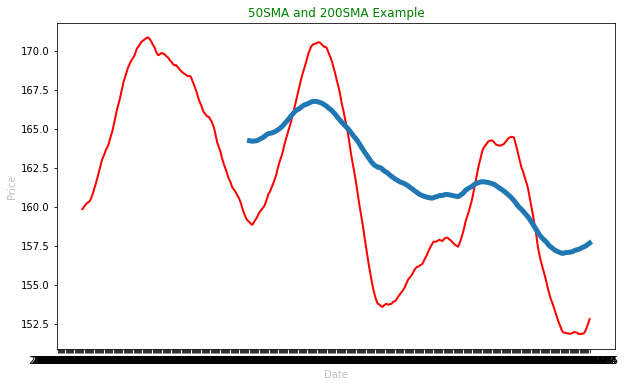

,Date,Open,Close,Volume,50SMA,200SMA
259,2023-01-12,169.127810,168.875473,4269400,170.461255,166.762501
260,2023-01-13,168.089298,168.322220,6088000,170.489402,166.758272
261,2023-01-17,168.875452,167.283752,6053300,170.548081,166.740047
262,2023-01-18,166.594667,164.760330,7047800,170.550699,166.720435
263,2023-01-19,164.051835,164.537109,6939500,170.534194,166.695139
264,2023-01-20,165.090317,163.770370,8620600,170.473425,166.674195
265,2023-01-23,164.119784,163.353043,8425400,170.387723,166.645739
266,2023-01-24,164.042139,163.353043,10541800,170.328829,166.595297
267,2023-01-25,162.246590,164.517670,7099800,170.254269,166.552915
268,2023-01-26,164.556505,163.915939,6946100,170.268350,166.505811


In [14]:
# Calculate SMAs for JNJ, use 50 and 200 day instead
jnj = yf.Ticker("JNJ")
df2 = jnj.history(start = "2022-01-01", end = "2024-01-08")
df2.index = df2.index.strftime('%Y-%m-%d')
df2["Date"] = df2.index
df2 = df2[["Date","Open","Close","Volume"]]
df2.index.name = "Index"
df2.index = range(1,len(df2) + 1)
df2['50SMA'] = df2['Close'].rolling(window=50).mean()
df2['200SMA'] = df2['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df2['Date'], df2['200SMA'], label='200SMA', linewidth=5)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example', color = "Green")
plt.show()

df2[df2['50SMA'] > df2['200SMA']].iloc[20:30]

# The short term needs to rise above the long term

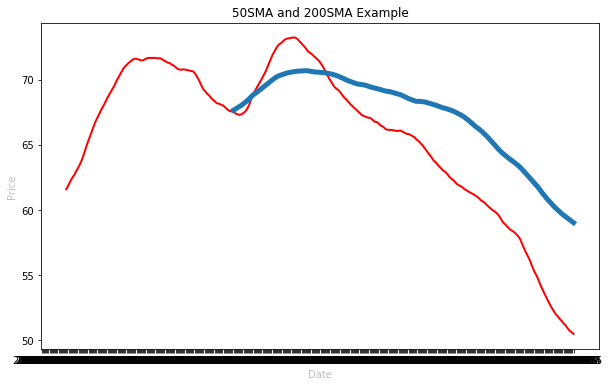

,Date,Open,Close,Volume,50SMA,200SMA
286,2023-02-22,68.594831,68.604446,5718900,70.062724,70.469861
287,2023-02-23,68.671787,68.691032,5459800,69.931667,70.452676
288,2023-02-24,68.412034,67.517319,6403400,69.775991,70.431504
289,2023-02-27,67.623147,67.334526,4990700,69.646058,70.409324
290,2023-02-28,67.151731,66.343597,8697900,69.500315,70.382848
291,2023-03-01,66.093469,66.728432,5883400,69.403121,70.357590
292,2023-03-02,66.603371,66.564888,6068900,69.331483,70.333867
293,2023-03-03,66.728429,66.670708,6540100,69.268261,70.305452
294,2023-03-06,66.738058,66.285889,7000100,69.207079,70.268950
295,2023-03-07,66.555259,65.420029,8135800,69.115598,70.233764


In [15]:
# Calculate SMAs for BMY, use 50 and 200 day instead
bmy = yf.Ticker("BMY")
df3 = bmy.history(start = "2022-01-01", end = "2024-01-08")
df3.index = df3.index.strftime('%Y-%m-%d')
df3["Date"] = df3.index
df3 = df3[["Date","Open","Close","Volume"]]
df3.index.name = "Index"
df3.index = range(1,len(df3) + 1)
df3['50SMA'] = df3['Close'].rolling(window=50).mean()
df3['200SMA'] = df3['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df3['Date'], df3['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df3['Date'], df3['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df3['Date'], df3['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()
df3.iloc[285:300]


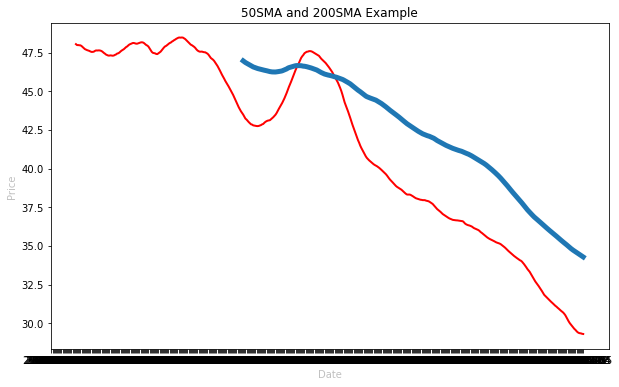

,Date,Open,Close,Volume,50SMA,200SMA
278,2023-02-09,42.592514,41.839520,20809200,46.432107,46.018187
279,2023-02-10,41.993980,42.360825,18619600,46.332483,46.001131
280,2023-02-13,42.167753,42.467022,17878000,46.222740,45.981291
281,2023-02-14,42.563557,42.206367,17506900,46.089608,45.956555
282,2023-02-15,41.916750,41.820213,18994700,45.952005,45.936609


In [16]:
# Pfizer
pfe = yf.Ticker("PFE")
df4 = pfe.history(start = "2022-01-01", end = "2024-01-08")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()

df4[df4['50SMA']>df4['200SMA']].tail()

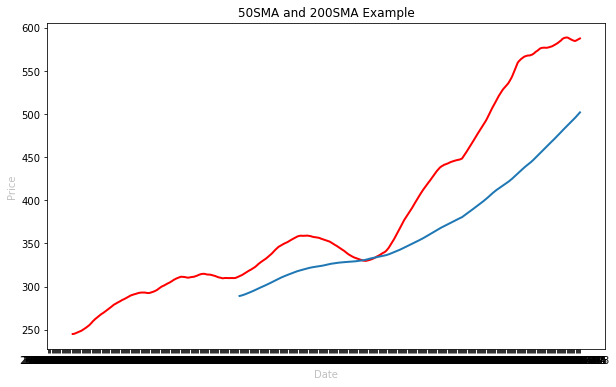

681.6537100816579

In [17]:
# Eli Lilly
lly = yf.Ticker("lly")
df5 = lly.history(start = "2022-01-01", end = "2024-01-09")
df5.index = df5.index.strftime('%Y-%m-%d')
df5["Date"] = df5.index
df5 = df5[["Date","Open","Close","Volume"]]
df5.index.name = "Index"
df5.index = range(1,len(df5) + 1)
df5['50SMA'] = df5['Close'].rolling(window=50).mean()
df5['200SMA'] = df5['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df5['Date'], df5['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df5['Date'], df5['200SMA'], label='200SMA', linewidth=2)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()

# df5[df5['50SMA']<df5['200SMA']].tail()
# Very Bullish Stock
# Buy on 4/14/2023 and sell today what is final portfolio value

buyprice = df5['Close'].iloc[321]
sellprice = df5["Close"].iloc[505]

ret = sellprice/buyprice - 1
fpv = 1000*(1+ret)
profit = fpv - 1000
profit

# Calculate compound rate of return - this is a little bit off cause its not a full year, same as simple return
r = (fpv/1000) - 1
r
profit


In [18]:
# Try doing the trading strategy on a couple of stocks (Portfolio) and see how much money you make

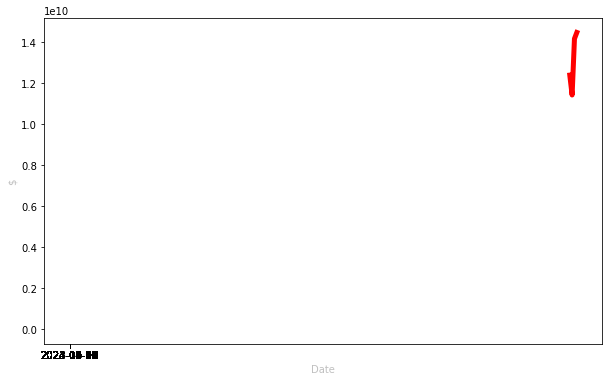

In [19]:
# United Airlines
ticker = 'UAL'
quarterly_financials = yf.Ticker(ticker).quarterly_financials
# We want to track changes in Total Revenue, Total Expenses, Net Income, Operating Income, and Diluted EPS over many quarters

# Isolate down each of the categories
# quarterly_financials.loc['Total Revenue']
# quarterly_financials.loc['Total Expenses']
# quarterly_financials.loc['Net Income']
# quarterly_financials.loc['Operating Income']
# quarterly_financials.loc['Diluted EPS']

df = pd.DataFrame()

df['Total Revenue'] = quarterly_financials.loc['Total Revenue']
df['Total Expenses'] = quarterly_financials.loc['Total Expenses']
df["Date"] = df.index

df = df[['Date','Total Revenue','Total Expenses']]
df = df.sort_values(by="Date")
df.index = range(1,len(df) + 1)

df

stock = yf.Ticker("UAL")
df9 = stock.history('1y')
df9.index = df9.index.strftime('%Y-%m-%d')
df9["Date"] = df9.index
df9
# df

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Total Revenue'], color = "red", label='TR', linewidth=5)
plt.plot(df9['Date'], df9['Close'], color = "Blue", label='close', linewidth=3)
# # plt.plot(df['Date'], df['Total Expenses'], label='TE', linewidth=2)
# # plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('$', color = 'silver')
# plt.title('TR & TE')
plt.show()
# df





# plt.figure(figsize=(10, 6))
# plt.plot(df[''], df5['50SMA'], color = "red", label='50SMA', linewidth=2)
# plt.plot(df5['Date'], df5['200SMA'], label='200SMA', linewidth=2)
# # plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
# plt.xlabel('Date', color = 'silver')
# plt.ylabel('Price', color = 'silver')
# plt.title('50SMA and 200SMA Example')
# plt.show()


# Comes out a little messed up



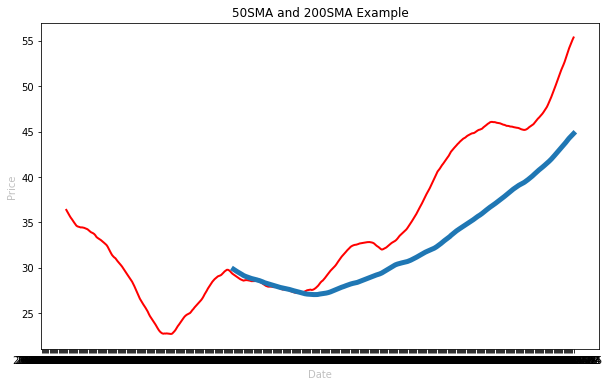

,Date,Open,Close,Volume,50SMA,200SMA
501,2023-12-29,62.360001,61.570000,21602500,54.2002,44.27845
502,2024-01-02,60.730000,58.380001,41978600,54.5134,44.40670
503,2024-01-03,57.480000,58.250000,31800600,54.8192,44.53905
504,2024-01-04,58.250000,57.799999,20370700,55.1144,44.66840
505,2024-01-05,58.110001,57.580002,17875200,55.3822,44.79200


In [20]:
# Uber

uber = yf.Ticker("UBER")
df4 = uber.history(start = "2022-01-01", end = "2024-01-08")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()

df4[df4['50SMA']>df4['200SMA']].tail()





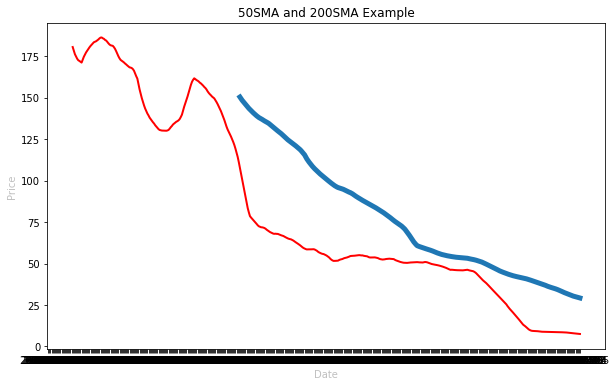

,Date,Open,Close,Volume,50SMA,200SMA


In [21]:
# AMC

amc = yf.Ticker("AMC")
df4 = amc.history(start = "2022-01-01", end = "2024-01-08")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()

df4[df4['50SMA']>df4['200SMA']].tail()


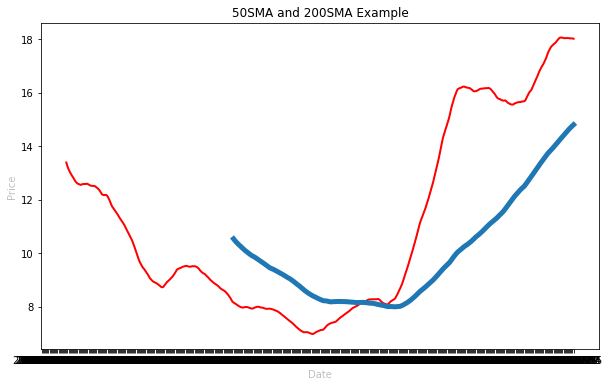

,Date,Open,Close,Volume,50SMA,200SMA
501,2023-12-29,17.520000,17.17,38805000,18.0426,14.64065
502,2024-01-02,16.950001,16.58,41626700,18.0330,14.68365
503,2024-01-03,16.120001,16.09,46865200,18.0326,14.72470
504,2024-01-04,16.049999,16.25,39937700,18.0336,14.76555
505,2024-01-05,15.700000,15.98,57628800,18.0204,14.80320


In [22]:
# Palantir


pltr = yf.Ticker("PLTR")
df4 = pltr.history(start = "2022-01-01", end = "2024-01-08")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('50SMA and 200SMA Example')
plt.show()

df4[df4['50SMA']>df4['200SMA']].tail()









In [23]:
# Tesla

In [24]:
# Make a trading bot to send you signals
# Comb through the S&P500 and see what happens
# Can i make this a project to where a user can input ticker and itll output these graphs

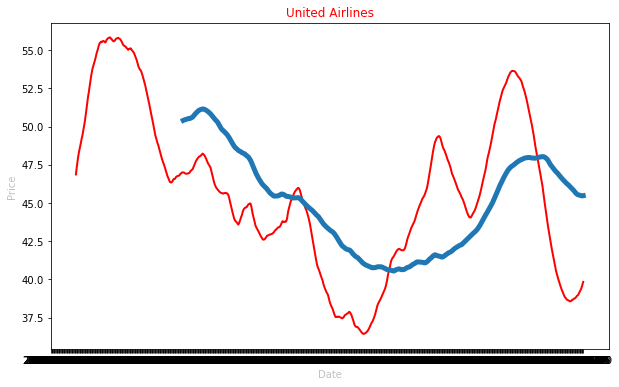

,Date,Open,Close,Volume,50SMA,200SMA
691,2023-10-02,42.320000,41.619999,6398900,49.0556,47.92810
692,2023-10-03,41.480000,40.529999,7045900,48.7450,47.93025
693,2023-10-04,40.900002,41.410000,7731100,48.4888,47.94455
694,2023-10-05,41.880001,41.320000,6480500,48.2238,47.95900
695,2023-10-06,41.270000,41.820000,6346100,47.9950,47.97820


In [27]:
# United Airlines
ual = yf.Ticker("UAL")
df4 = ual.history(start = "2021-01-01", end = "2024-01-10")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('United Airlines', color = 'red')
plt.show()

df4[df4['50SMA']>df4['200SMA']].tail()




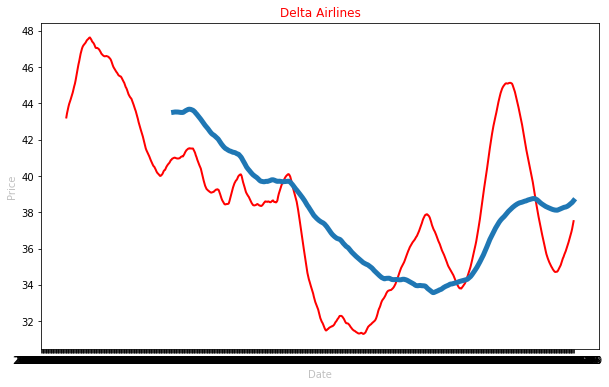

In [29]:
# Delta Airlines
ticker = yf.Ticker("DAL")
df4 = ticker.history(start = "2021-01-01", end = "2024-01-10")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('Delta Airlines', color = 'red')
plt.show()

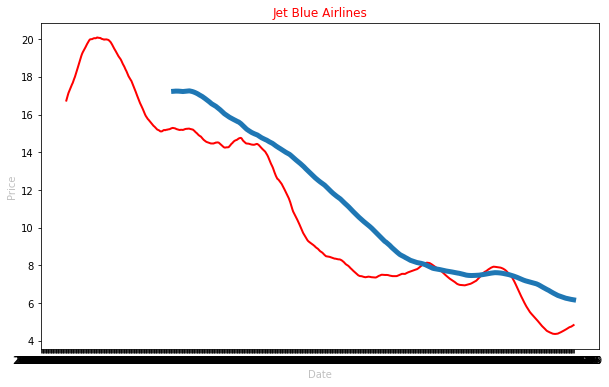

In [30]:
# Jet Blue
ticker = yf.Ticker("JBLU")
df4 = ticker.history(start = "2021-01-01", end = "2024-01-10")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('Jet Blue Airlines', color = 'red')
plt.show()


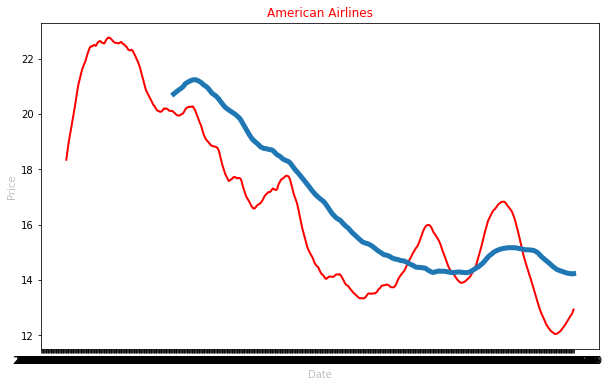

In [31]:
ticker = yf.Ticker("AAL")
df4 = ticker.history(start = "2021-01-01", end = "2024-01-10")
df4.index = df4.index.strftime('%Y-%m-%d')
df4["Date"] = df4.index
df4 = df4[["Date","Open","Close","Volume"]]
df4.index.name = "Index"
df4.index = range(1,len(df4) + 1)
df4['50SMA'] = df4['Close'].rolling(window=50).mean()
df4['200SMA'] = df4['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(df4['Date'], df4['50SMA'], color = "red", label='50SMA', linewidth=2)
plt.plot(df4['Date'], df4['200SMA'], label='200SMA', linewidth=5)
# plt.plot(df4['Date'], df4['Close'], color = "violet", label='Close Price', linewidth=7)
plt.xlabel('Date', color = 'silver')
plt.ylabel('Price', color = 'silver')
plt.title('American Airlines', color = 'red')
plt.show()